In [5]:
%pylab inline
%matplotlib inline
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt #matplotlib.pyplot plots data
import matplotlib.cm
import matplotlib.colors as colors
import seaborn
import io

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.naive_bayes import MultinomialNB
from matplotlib.colors import Normalize
from numpy import array
from numpy import max
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection


cafe = pd.read_excel('5000ptos_clima .xlsx',sheetname=0, dtype={'dem': float32, 
                                                                'bio_1': float32, 
                                                                'bio_2': float32, 
                                                                'bio_3': float32, 
                                                                'bio_4': float32,
                                                                'bio_7': float32, 
                                                                'bio_12': float32, 
                                                                'bio_15': float32,
                                                               'bio_15': float32,
                                                               'OL_1': float32,
                                                               'OL_2': float32,
                                                               'OL_3': float32,
                                                               'OL_4': float32,
                                                               'OL_5': float32,
                                                               'OL_6': float32,
                                                               'OL_7': float32,
     # We don't have OL_8 so this value is unnecesary          'OL_8': float32, 
                                                               'OL_9': float32,
                                                               'OL_10': float32,
                                                               'OL_11': float32,
                                                               'OL_12': float32,
                                                               'OL_TOT': float32,})

# We introduce the excel file called as 5000ptos_clima in "cafe" 
a=cafe[cafe.columns[24:35]]
cafe['OL_TOT'] = cafe[cafe.columns[24:35]].sum(1)



Populating the interactive namespace from numpy and matplotlib


/Users/macbookpro/Library/Enthought/Canopy/edm/envs/User/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [147]:
cafe.loc[cafe.coordenadas == cafe.coordenadas]
subset = cafe.loc[cafe.coordenadas == cafe.coordenadas] 
coordenadas = subset[['POINT_Y','POINT_X','coordenadas','bio_1', 'bio_12']]

 

caracteristicas = subset[['POINT_Y','POINT_X','dem', 'bio_1','bio_2','bio_3','bio_4','bio_5',
                         'bio_6','bio_7','bio_8','bio_9','bio_10',
                         'bio_11','bio_12','bio_13','bio_14','bio_15','OL_TOT','OL_D']]

caracteristicas.loc[caracteristicas['OL_TOT'] >= 81, "OL_D"] = 1 # that means excelency
caracteristicas.loc[caracteristicas['OL_TOT'] < 81, "OL_D"] = 0 # that means not excelency
caracteristicas.loc[caracteristicas['OL_TOT'].isnull()  , "OL_TOT"] = 0
caracteristicas.loc[caracteristicas['OL_D'].isnull()  , "OL_D"] = 0 # we put this to solve 
#when we do the model.

# we suspect that the most important are 'bio_1','bio_2','bio_3','bio_4','bio_7',
#'bio_12', 'bio_15' and 'dem'

coordenadas.head()

/Users/macbookpro/Library/Enthought/Canopy/edm/envs/User/lib/python3.5/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,POINT_Y,POINT_X,coordenadas,bio_1,bio_12
0,19.969644,-96.941458,"-96.941458 , 19.969644",23.683001,1855.0
1,18.763266,-96.925916,"-96.925916 , 18.763266",19.367001,2686.0
2,19.996338,-97.046474,"-97.046474 , 19.996338",22.888000,1806.0
3,19.454037,-96.933481,"-96.933481 , 19.454037",18.962999,1713.0
4,19.572977,-96.818368,"-96.818368 , 19.572977",20.517000,1164.0


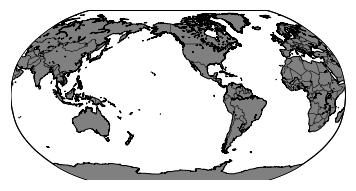

In [148]:
lats, lons = list(cafe['POINT_Y']), list(cafe['POINT_X'])
# with columns POINT_Y and POINT_X we create the variables "lats" and "lons" to use
# them like laltitude and longitude in the second map
eq_map = Basemap(projection='robin', resolution = 'l', area_thresh = 1000.0,
              lat_0=0, lon_0=-130)
# We create a map kind Robin with center in (-130,0)
eq_map.drawcoastlines()
eq_map.drawcountries()
eq_map.fillcontinents(color = 'gray')
# the lines before works to put of gray color the countries, show the coast and countries
eq_map.drawmapboundary()
plt.show()
############################################################################################
# With the previus code we could put a Global-map

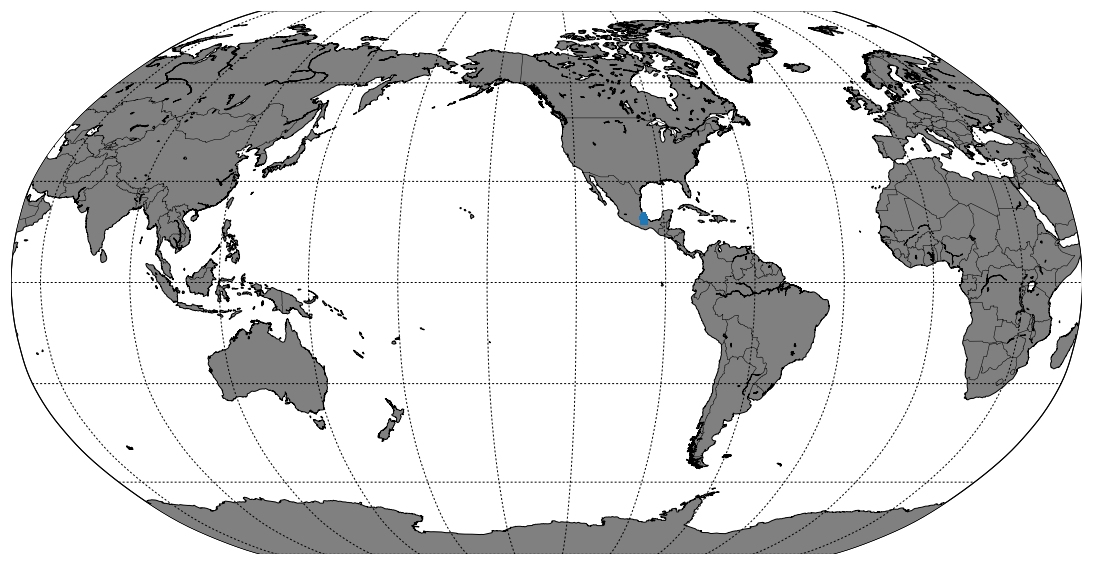

In [149]:
figu, ax = plt.subplots(figsize=(20,10))
eq_map = Basemap(projection='robin', resolution = 'l', area_thresh = 1000.0,
              lat_0=0, lon_0=-130)
# We create a map kind Robin with center in (-130,0) in eq_map
eq_map.drawcoastlines()
eq_map.drawcountries()
eq_map.fillcontinents(color = 'gray')
eq_map.drawmapboundary()
eq_map.drawmeridians(np.arange(0, 360, 30))
eq_map.drawparallels(np.arange(-90, 90, 30))
# drawmeridians and drawparallels works to draw the meridian and ecuatorian lines in the map
# which we can see as grid.

# Position coordinates 
x,y = eq_map(lons, lats)

# we put in the map the values of X and Y (laltitude and longitude)
eq_map.plot(x, y, '^', markersize=6)

############################################################################################
 We going to analize the location according the region for that reason we search the latitude  and longitude of Veracruz region.
 
Regions:
-Atzalan, Coordenate from 19.78695,-97.24282
-Coatepec, Coordenate from 19.4536,-96.9588 altitude = close to 1200 m
-Cordoba, Coordenate from 18.86529,-96.95524
-Huatusco, Coordenate from 19.12727,-96.81749
-Ixhuatlan, Coordenate from 18.03559,-94.34719
-Misantla, Coordenate from 19.93651,-96.85377
-Zongolica, Coordenate from 18.66552,-96.9980 altitude = close to 1200 m 

 We know that Zongolica and Coatepec are the places where is the best coffe because we have a lot of grades of excelency in OL_TOT (feactures "organolépticas") in that regions.

 In the state of Veracruz there are ten coffee regions that are Atzalan, Chicontepec, 
 Coatepec, Cordoba, Huatusco, Los Tuxtlas, Misantla, Papantla, Tezonapa and Zongolica 
 but we just have info about Atzalan, Coatepec, Cordoba, Huatusco, Ixhuatlan, Misantla 
 and Zongolica according ours coordenates. 

 According to the state, Caotepec is the best region of coffe so we going to do a cross 
 validation of tempertura, pression and the OD_TOT (grades).

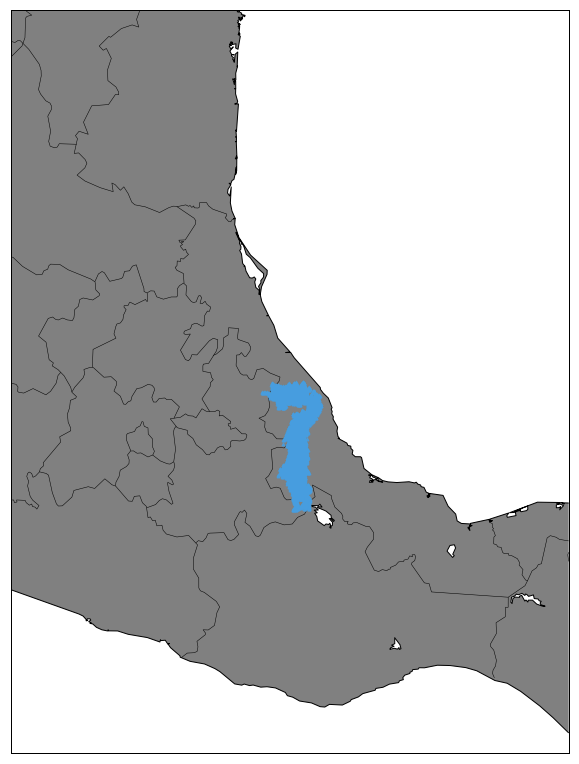

In [150]:
fig, ax = plt.subplots(figsize=(10,20))

mapa = Basemap(projection='merc', 
    lat_0 = 19.12439, lon_0 = -96.59617,
    resolution = 'i',    
    llcrnrlon=-101, llcrnrlat=15,
    urcrnrlon=-93, urcrnrlat=25)           
# We put this to see only the values of Veracruz

# We put in the variable "mapa" a projection kind Mercator (MERC) with center in 
# (-96.59617 , 19.12439) to see all the cafe neighbors, we choose that value because we get 
# the median value of X and Y; also we choose between 15 to 25 and -101 to -93 to be able of 
# get the coordenates of 19.93651 to 18.03559 in Y and -97.24282 to -94.34719 in X
# 
# 
               
mapa.drawmapboundary()
mapa.drawcoastlines()
mapa.drawstates()
mapa.fillcontinents(color = 'gray')
x,y = mapa(lons, lats)
mapa.plot(x, y, '^', markersize=3, color='#479EE0', alpha=0.8)
        

# you must put a value with a scale RGB in the option color
# coordenadas.coordenadas.apply(plot_area)

plt.show()


In [151]:
f=caracteristicas.loc[caracteristicas['OL_TOT'] >= 81]
# We show only the OL_TOT with values greater or equal to 81 because 
# that correpond to a excelency coffe
f.loc[f['OL_TOT'] >= 81, "OL_D"] = 1 # that means excelency
f.loc[f['OL_TOT'] < 81, "OL_D"] = 0 # that means excelency
f.head()

/Users/macbookpro/Library/Enthought/Canopy/edm/envs/User/lib/python3.5/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,POINT_Y,POINT_X,dem,bio_1,bio_2,bio_3,bio_4,bio_5,bio_6,bio_7,bio_8,bio_9,bio_10,bio_11,bio_12,bio_13,bio_14,bio_15,OL_TOT,OL_D
5002,19.335611,-97.002997,1277.719971,18.883301,10.3667,62.449799,194.121994,27.2,10.6,16.6,20.4000,16.8833,20.9333,16.2500,2004.0,377,46,75.131302,82.250000,1.0
5003,19.336886,-96.976104,1164.979980,19.391701,10.4167,61.274502,206.330002,28.0,11.0,17.0,20.9667,17.2667,21.5500,16.6000,1969.0,367,47,75.551300,81.750000,1.0
5004,19.303717,-96.988761,1214.890015,19.291700,10.5500,61.695900,205.102997,27.9,10.8,17.1,20.8500,17.1667,21.4833,16.5333,1988.0,373,46,76.694397,81.750000,1.0
5007,19.729124,-97.098297,1214.130005,18.533300,9.9000,57.894699,234.572006,27.1,10.0,17.1,19.4333,18.0333,21.0833,15.4167,1758.0,318,54,56.064400,81.333336,1.0
5008,19.731869,-97.089580,1512.979980,18.204201,9.7583,57.066299,234.979996,26.7,9.6,17.1,19.0667,17.7667,20.7833,15.0833,1661.0,308,52,56.511700,81.428574,1.0


In [152]:
caracteristicas = pd.DataFrame(caracteristicas)
def plot_corr(caracteristicas, size=17):
    corr=caracteristicas.corr() #data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr) #colour code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns) # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns) #draw y tick marks

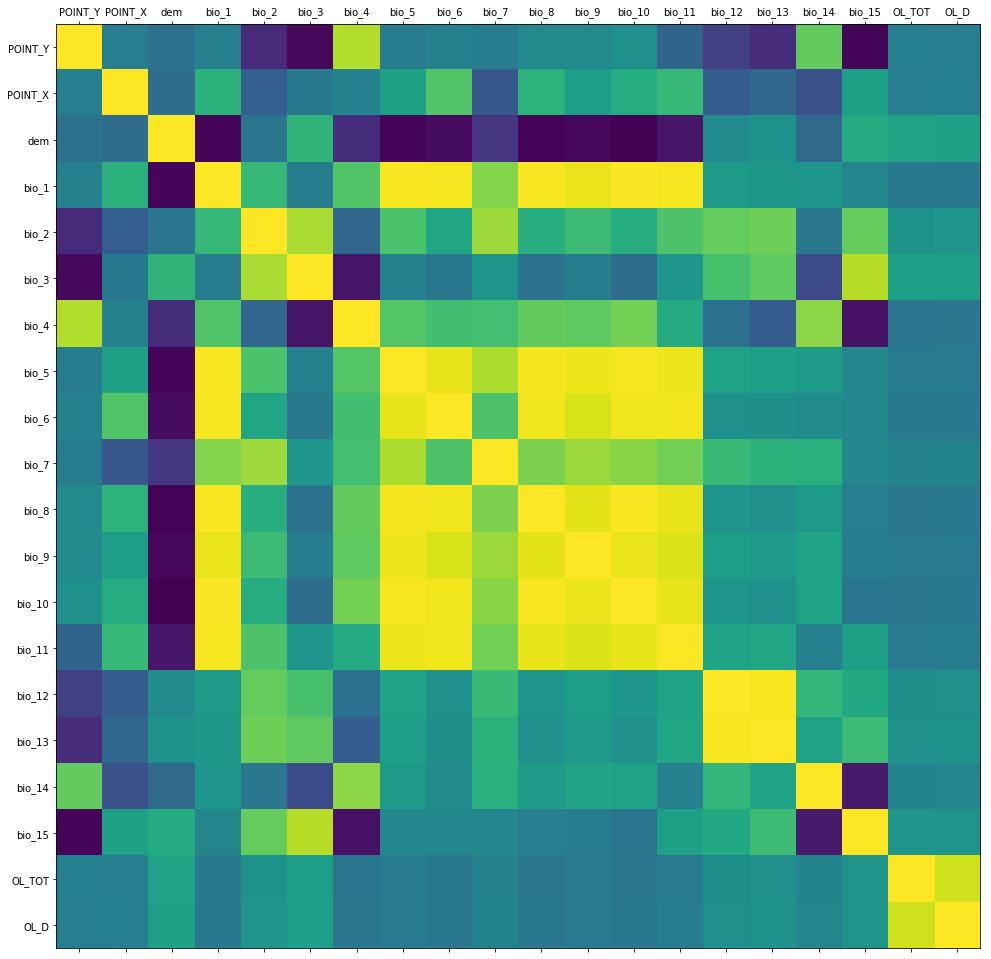

In [153]:
plot_corr(caracteristicas)

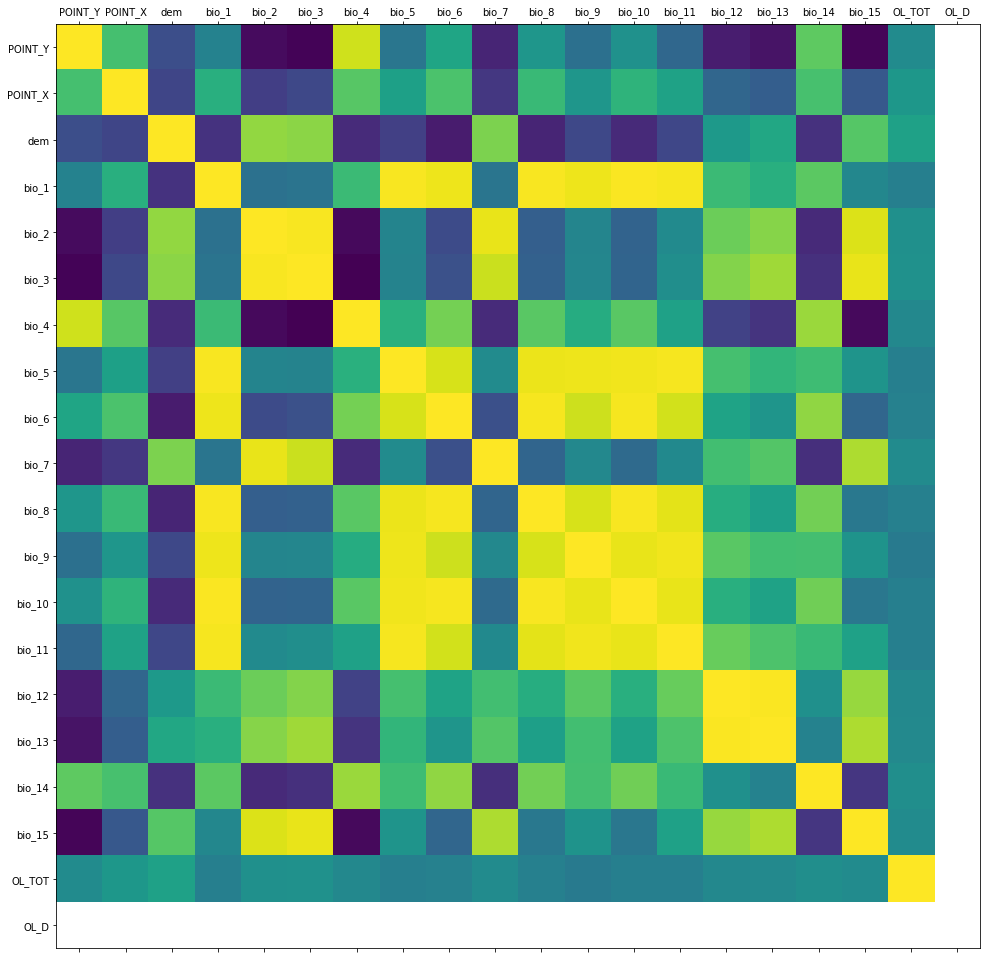

In [154]:

f1 = pd.DataFrame(f)
def plot_corr(f1, size=17):
    corr=f1.corr() #data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr) #colour code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns) # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns) #draw y tick marks
# We use a correlation to see all the factors that afect the coffe to get 
# a OL_TOT with a excelency level
plot_corr(f)

In [155]:
f1.corr()

,POINT_Y,POINT_X,dem,bio_1,bio_2,bio_3,bio_4,bio_5,bio_6,bio_7,bio_8,bio_9,bio_10,bio_11,bio_12,bio_13,bio_14,bio_15,OL_TOT,OL_D
POINT_Y,1.000000,0.422531,-0.485686,-0.086268,-0.895194,-0.937435,0.855679,-0.187046,0.191180,-0.749790,0.072694,-0.231901,0.036486,-0.299611,-0.795451,-0.851153,0.515990,-0.926144,-0.009608,NaN
POINT_X,0.422531,1.000000,-0.545138,0.276182,-0.590318,-0.528070,0.494248,0.159451,0.443834,-0.641894,0.369047,0.070403,0.317425,0.169186,-0.307422,-0.370689,0.430768,-0.420072,0.079849,NaN
dem,-0.485686,-0.545138,1.000000,-0.668629,0.680580,0.661069,-0.716078,-0.584985,-0.805108,0.617031,-0.755890,-0.533216,-0.724667,-0.539933,0.104796,0.216539,-0.678239,0.487375,0.160789,NaN
bio_1,-0.086268,0.276182,-0.668629,1.000000,-0.223217,-0.203266,0.379774,0.979821,0.949717,-0.191569,0.977257,0.952258,0.991319,0.974398,0.381235,0.275059,0.506610,-0.051657,-0.107897,NaN
bio_2,-0.895194,-0.590318,0.680580,-0.223217,1.000000,0.977487,-0.902329,-0.072955,-0.507297,0.935960,-0.365731,-0.068641,-0.334656,-0.019651,0.560644,0.642321,-0.721609,0.897148,0.023450,NaN
bio_3,-0.937435,-0.528070,0.661069,-0.203266,0.977487,1.000000,-0.955322,-0.081295,-0.470053,0.841896,-0.348715,-0.055931,-0.323487,0.014581,0.637546,0.718273,-0.685938,0.935723,0.035541,NaN
bio_4,0.855679,0.494248,-0.716078,0.379774,-0.902329,-0.955322,1.000000,0.286890,0.591206,-0.717158,0.501453,0.253664,0.496139,0.162750,-0.571616,-0.665029,0.703252,-0.908084,-0.046180,NaN
bio_5,-0.187046,0.159451,-0.584985,0.979821,-0.072955,-0.081295,0.286890,1.000000,0.880709,-0.008537,0.943080,0.950670,0.959163,0.975288,0.426940,0.329928,0.394683,0.059271,-0.114170,NaN
bio_6,0.191180,0.443834,-0.805108,0.949717,-0.507297,-0.470053,0.591206,0.880709,1.000000,-0.481159,0.976165,0.851947,0.972942,0.869495,0.180898,0.062104,0.674107,-0.306154,-0.095909,NaN
bio_7,-0.749790,-0.641894,0.617031,-0.191569,0.935960,0.841896,-0.717158,-0.008537,-0.481159,1.000000,-0.315405,-0.039114,-0.278835,-0.030598,0.408267,0.479511,-0.692674,0.756037,-0.008825,NaN


how we can see the only values positves in OL_TOT are POINT_X, dem, bio_2,bio_3 and bio_14

In [156]:
f2 = f1[['dem', 'bio_2','bio_3', 'bio_12','bio_14','OL_TOT']]

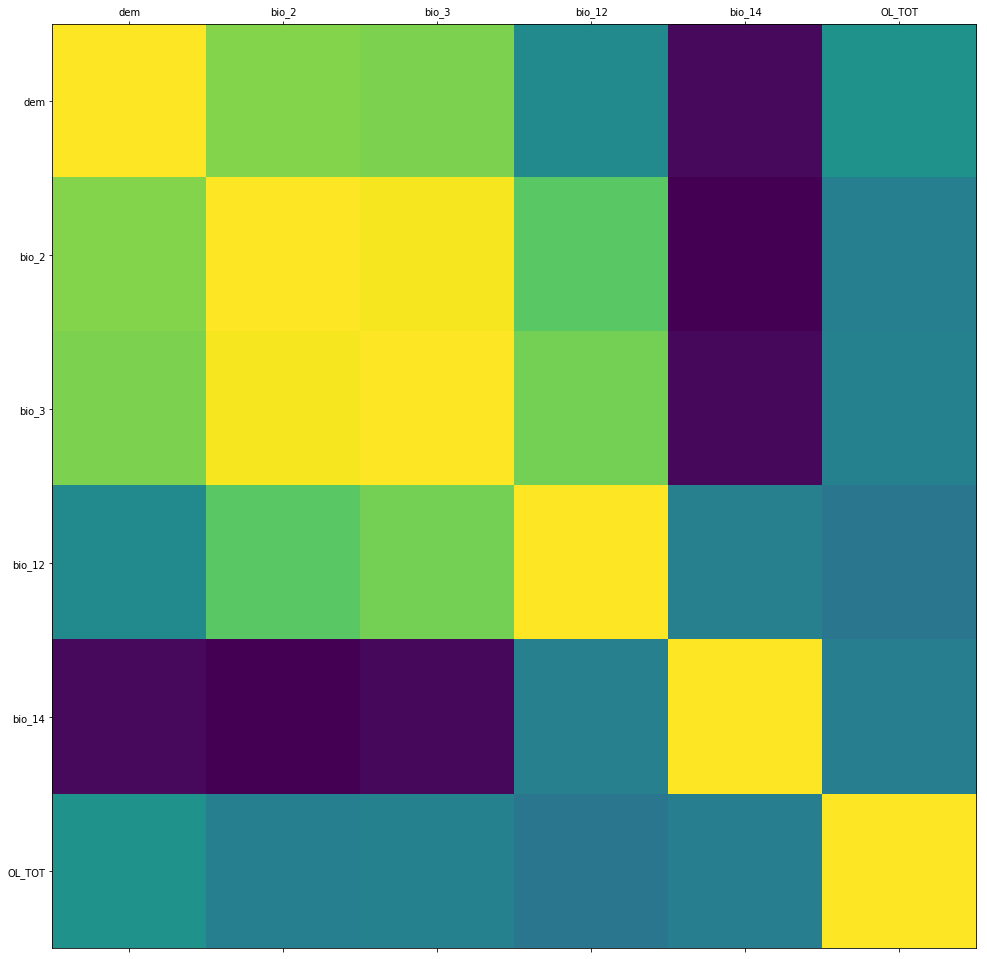

In [157]:
plot_corr(f2)

We see with a clear color the most influential factors in OL_TOT and the values of corr as the most important.
-Dem (Altitud).
-bio_2(Mean Diurnal Range (Mean of monthly (max temp - min temp))).
-bio_3 (Isothermality (BIO2/BIO7) (* 100)).
-bio_12 (Anual precipitation).
-bio_14 (Precipitation of driest Month). 

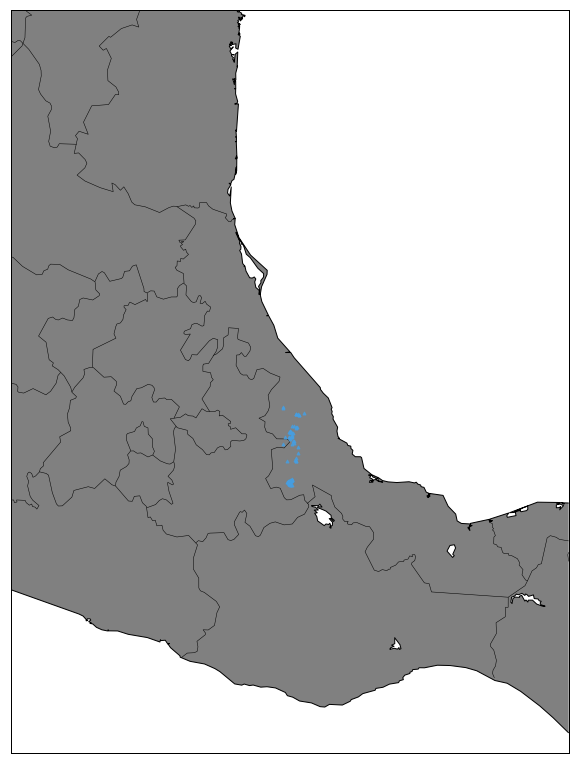

In [158]:
fig, ax = plt.subplots(figsize=(10,20))

mapa = Basemap(projection='merc', 
    lat_0 = 19.12439, lon_0 = -96.59617,
    resolution = 'i',    
    llcrnrlon=-101, llcrnrlat=15,
    urcrnrlon=-93, urcrnrlat=25)           
               
mapa.drawmapboundary()
mapa.drawcoastlines()
mapa.drawstates()
mapa.fillcontinents(color = 'gray')
lats2, lons2 = list(f['POINT_Y']), list(f['POINT_X'])
x,y = mapa(lons2, lats2)
mapa.plot(x, y, '^', markersize=3, color='#479EE0', alpha=0.8)
        

# you must put a value with a scale RGB in the option color
# coordenadas.coordenadas.apply(plot_area)

plt.show()



With this we plot again the points but now just the points with OL_TOT >= 81 so we can see that coatepec and zongolica are the areas where are the mayority of valeus with 81, we can conlude that the altitud is a factor importante because the altitude in that regions is high and the gave only values upper to 1200 in dem.

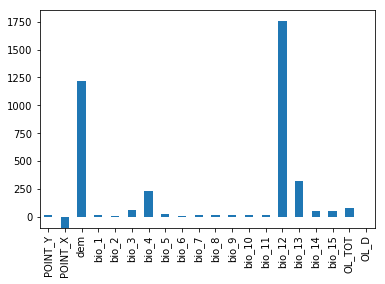

In [159]:
f.iloc[3].plot(kind='bar');


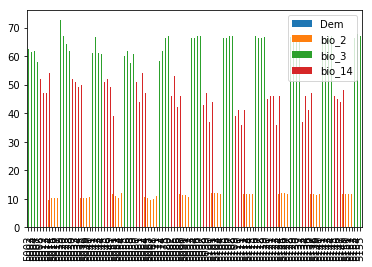

In [160]:
df2 = pd.DataFrame(f2, columns=['Dem', 'bio_2', 'bio_3', 'bio_14'])
df2.plot.bar();

The before tables works to know that the values of temperture and precipitation to have a good coffe is about 68ºF or 20ºC (bio_3) in the mount most warm and upper to 2000 of anual precipitation.
With the next code we can create a model to predict a good coffe by cross validation and naive bayes.

In [162]:
num_true = len(caracteristicas.loc[caracteristicas['OL_D'] == 1])
num_false = len(caracteristicas.loc[caracteristicas['OL_D'] == 0])
print("Number of True cases: {0} ({1:2.2f}%)".format(num_true, (num_true/(num_true+num_false))*100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (num_false/(num_true+num_false))*100))

Number of True cases: 115 (2.23%)
Number of False cases: 5042 (97.77%)


In [163]:
caracteristicas.loc[caracteristicas['OL_TOT'] >= 81, "OL_TOT"] = 1 # that means excelency
caracteristicas.loc[caracteristicas['OL_TOT'] < 81, "OL_TOT"] = 0 # that means not excelency

feature_col_names = ['bio_2', 'bio_3', 'bio_12', 'bio_14', 'dem']
predicted_class_names = ['OL_D']

X = caracteristicas[feature_col_names].values # predictor feature columns (5 X m)
y = caracteristicas[predicted_class_names].values # predicted class (1=true, 0=false) column (1 X m)
split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42)


In [164]:
print("{0:0.2f}% in training set".format((len(X_train)/len(caracteristicas.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(caracteristicas.index)) * 100))

69.98% in training set
30.02% in test set


We check to ensure we have the desired 70% train, 30% split of the data.
 
We comparate feature_col_names = ['bio_2', 'bio_3', 'bio_12', 'bio_14', 'dem'] with 
predicted_class_names = ['OL_TOT'] to see if we get a good note.

We check to ensure we have the desired 70% train, 30% split of the data

In [166]:
print("Original True: {0} ({1:0.2f}%)".format(len(caracteristicas.loc[caracteristicas['OL_D'] == 1]), (len(caracteristicas.loc[caracteristicas['OL_TOT'] == 1])/len(caracteristicas.index)) * 100))
print("Original False: {0} ({1:0.2f}%)".format(len(caracteristicas.loc[caracteristicas['OL_D'] == 0]), (len(caracteristicas.loc[caracteristicas['OL_TOT'] == 0])/len(caracteristicas.index)) * 100))
print("")
print("Training True: {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training False: {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test True: {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test True: {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))



Original True: 115 (0.00%)
Original False: 5042 (100.00%)

Training True: 78 (2.16%)
Training False: 3531 (97.84%)

Test True: 37 (2.39%)
Test True: 1511 (97.61%)


We verifying predicted value was split correctly.
Also we see the proportion of values with a "excelency" coffe and "normal" in orginal true and 
original false

In [169]:
fill_0 = Imputer(missing_values=0, strategy="mean", axis=0)

X_train = fill_0.fit_transform(X_train)
X_test = fill_0.fit_transform(X_test)

it's delete the values "0" to our model because that values don't represent a good coffe 

In [170]:
from sklearn.naive_bayes import GaussianNB

# Create Gaussian Naive Bayes model object and train it with the data
nb_model = GaussianNB()

nb_model.fit(X_train, y_train.ravel())

GaussianNB(priors=None)

In this part is created our Gaussian Naive Bayes model wich use X_train, y_train.ravel previusly created to feed the model. 

A model is so good as the information used, so for that reason we preparethe info previosly.

In [173]:
# predict values using the training data
nb_predict_train = nb_model.predict(X_train)

# import the performance metrics library
from sklearn import metrics

# Accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, nb_predict_train)))

Accuracy: 0.9554


Performance on Testing Data.

here is the juicy of our model because we get a prediction by the training data. also we evelute the preformance of the model with "from sklearn import metrics" 

In [174]:
# predict values using the testing data
nb_predict_test = nb_model.predict(X_test)

from sklearn import metrics

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, nb_predict_test)))

Accuracy: 0.9548


In [178]:
print("Confusion Matrix")
# Note the use of labels for set 1=True to upper left and 0=False to lower left
print("{0}".format(metrics.confusion_matrix(y_test, nb_predict_test, labels=[1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, nb_predict_test, labels=[1, 0]))

Confusion Matrix
[[  17   20]
 [  50 1461]]

Classification Report
             precision    recall  f1-score   support

          1       0.25      0.46      0.33        37
          0       0.99      0.97      0.98      1511

avg / total       0.97      0.95      0.96      1548



Our model have 95% of accurancy but this it's a little suspicius because it's very dificult found a model perfect , however with this we can conclude that our model is avaible to determinate if a coffe is excelente (delicious) of just a simple coffe.

##############################################################################################
change the parameters to see changes in the model 

In [179]:
X = caracteristicas[feature_col_names].values # predictor feature columns (5 X m)
y = caracteristicas[predicted_class_names].values # predicted class (1=true, 0=false) column (1 X m)
split_test_size = 0.40

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42)


In [180]:
from sklearn.naive_bayes import GaussianNB

# Create Gaussian Naive Bayes model object and train it with the data
nb_model = GaussianNB()

nb_model.fit(X_train, y_train.ravel())

GaussianNB(priors=None)

In [181]:
# predict values using the training data
nb_predict_train = nb_model.predict(X_train)

# import the performance metrics library
from sklearn import metrics

# Accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, nb_predict_train)))

Accuracy: 0.9567


In [182]:
# predict values using the testing data
nb_predict_test = nb_model.predict(X_test)

from sklearn import metrics

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, nb_predict_test)))

Accuracy: 0.9583


In [185]:
print("Confusion Matrix")
# Note the use of labels for set 1=True to upper left and 0=False to lower left
print("{0}".format(metrics.confusion_matrix(y_test, nb_predict_test, labels=[1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, nb_predict_test, labels=[1, 0]))

Confusion Matrix
[[  22   25]
 [  61 1955]]

Classification Report
             precision    recall  f1-score   support

          1       0.27      0.47      0.34        47
          0       0.99      0.97      0.98      2016

avg / total       0.97      0.96      0.96      2063



 Biblgraphy.
 
 http://www.icafe.cr/wp-content/uploads/cicafe/documentos/GUIA-TECNICA-V10.pdf
 
 http://aprendiendodatascience.blogspot.mx/2014/03/pandas.html
 
 https://stackoverflow.com/questions/45948418/summing-columns-in-a-pandas-dataframe
 
 https://pandas.pydata.org/pandas-docs/stable/visualization.html
 
 https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.rand.html
 
 https://es.wikipedia.org/wiki/Coatepec_(Veracruz)
 
 https://es.wikipedia.org/wiki/Zongolica
 
 https://contactohoy.com.mx/cafe-veracruz-el-aroma-que-distingue-a-una-region/
 
 https://es.schoolofdata.org/2017/11/02/geodatos-con-python/
 
 https://www.cityexpress.com/blog/coatepec-veracruz-mejor-taza-cafe-mexico
 
 https://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe